In [54]:
# IMPORTS
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

# PASO 1: PLANTEAMIENTO DEL PROBLEMA

- OBJETIVO: Predecir en base a medidas diagnósticas si un paciente tiene o no diábetes. 

In [55]:
# CARGAR EL DATASET

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# PASO 2: EXPLORACÓN Y LIMPIEZA DE DATOS

In [56]:
total_data.shape

(768, 9)

In [57]:
# OBTENER INFORMACIÓN SOBRE LOS TIPOS DE DATOS Y VALORES NO NULOS
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
print(total_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [60]:
total_data.duplicated().sum()

np.int64(0)

# PASO 3: ANÁLISIS DE VARIABLES UNIVARIANTE

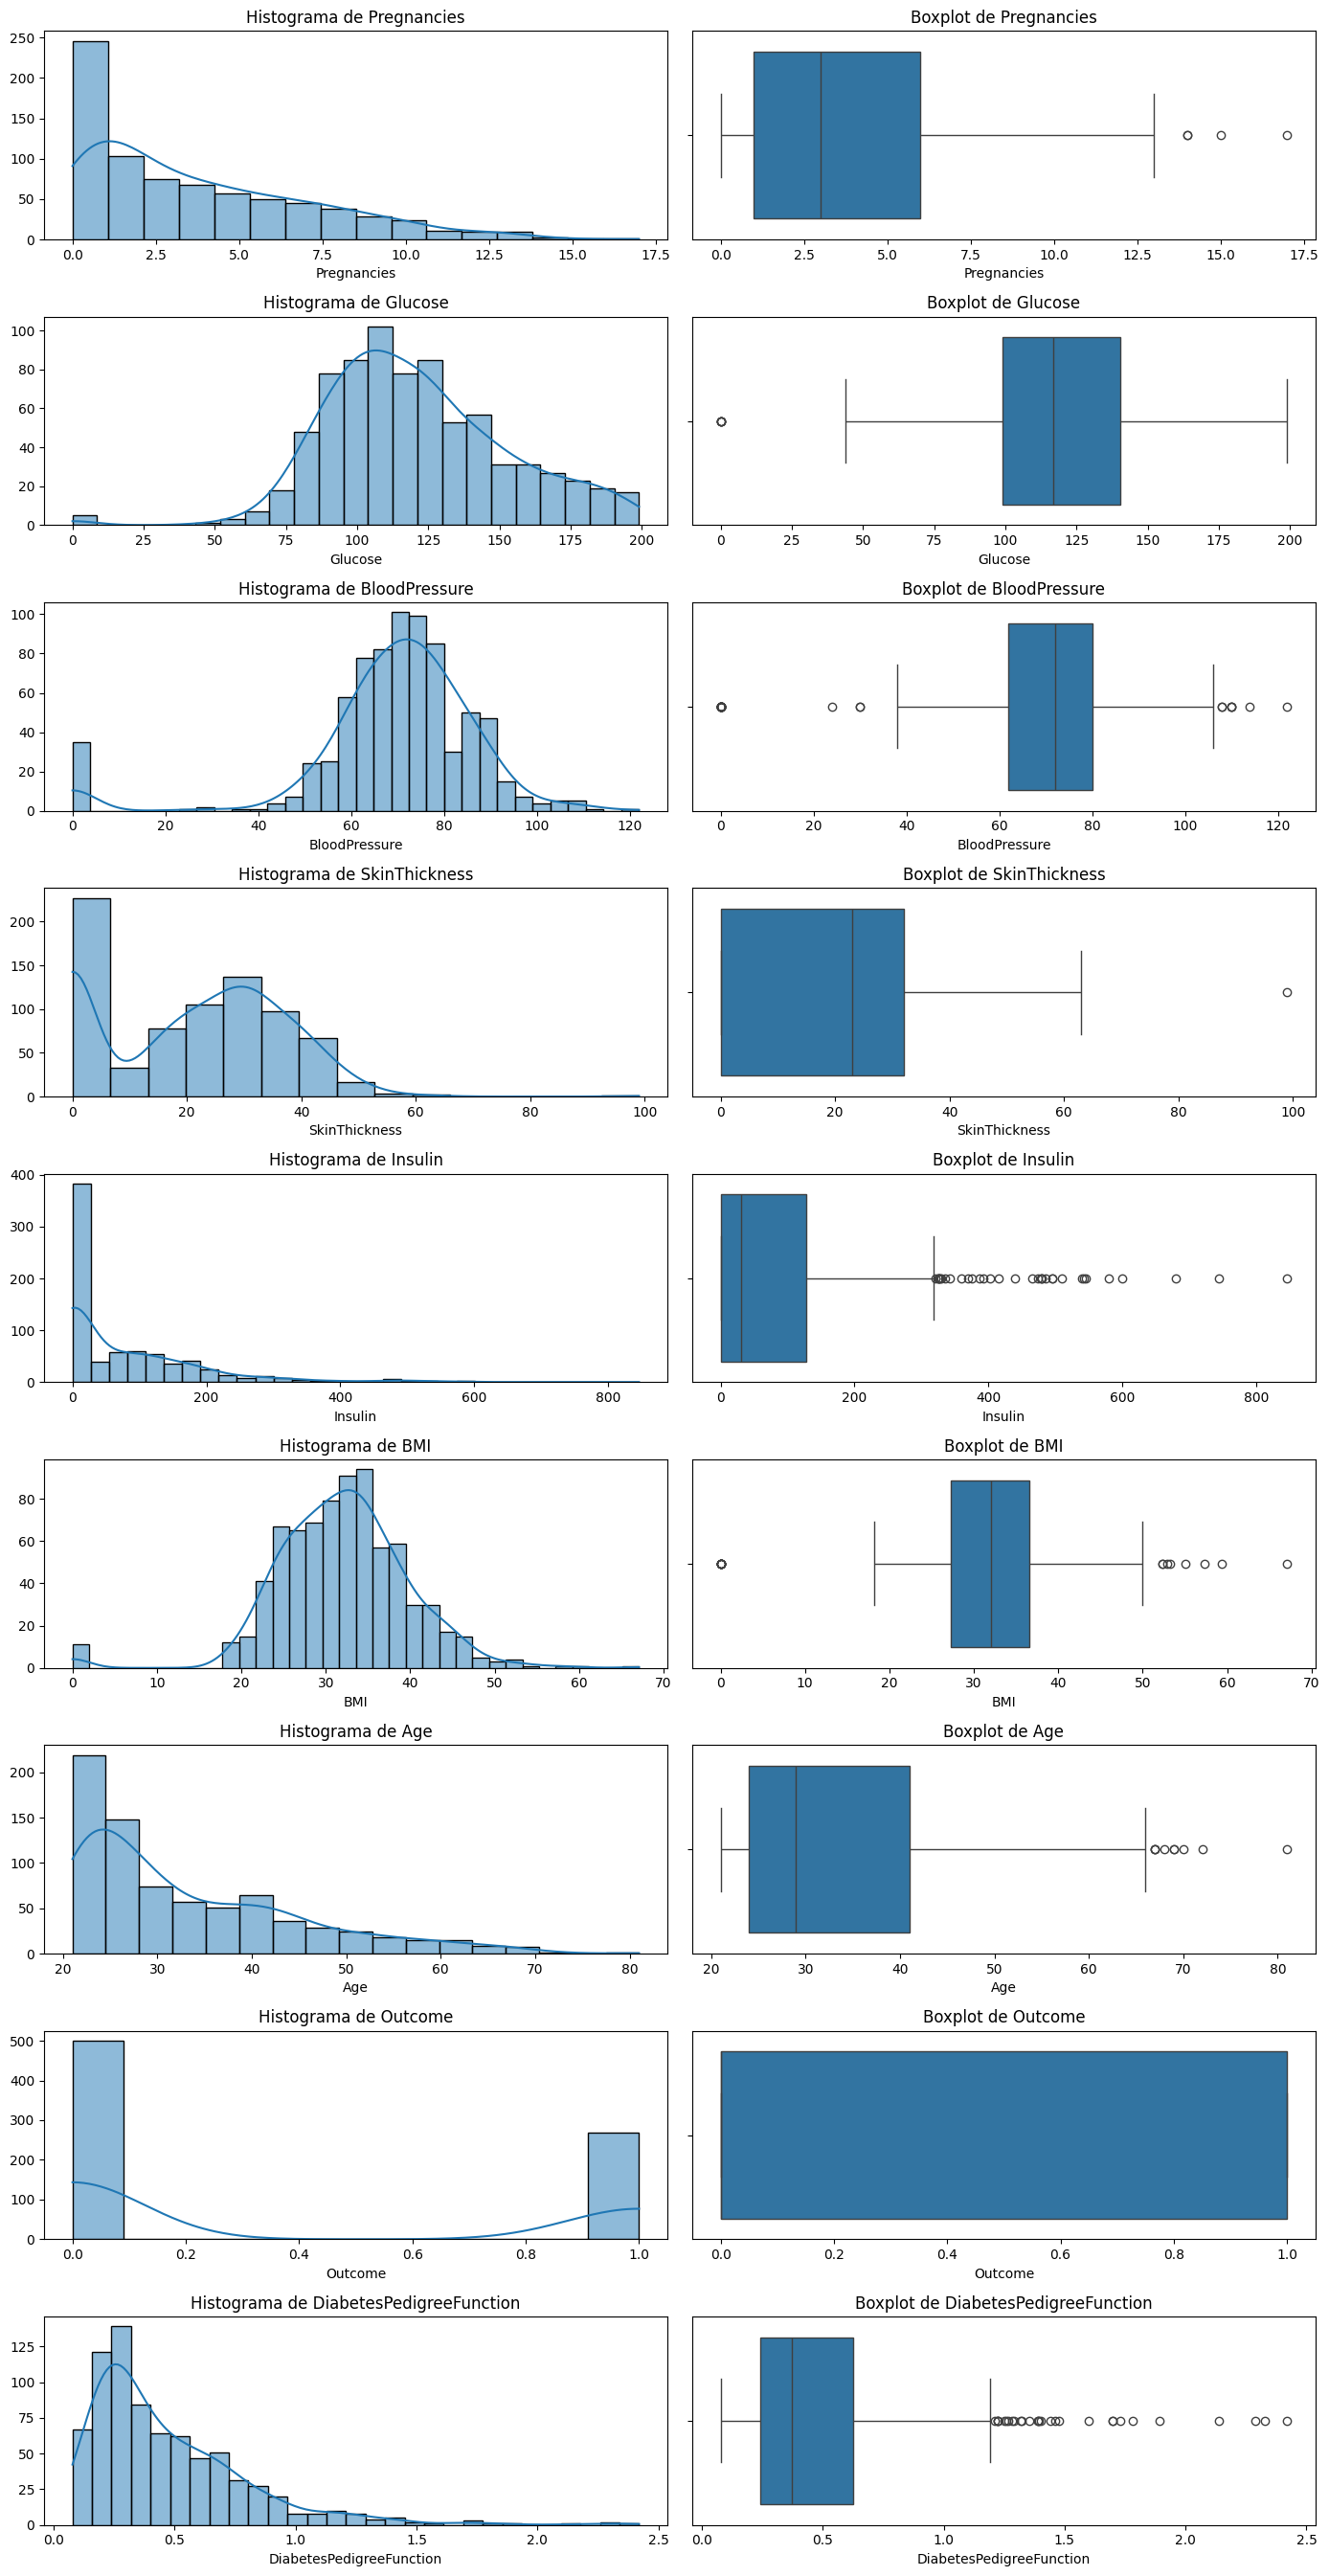

In [61]:
# Lista de variables numéricas
numerica_vars = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome", "DiabetesPedigreeFunction"]

# Configurar número de filas y columnas (2 gráficos por variable)
n_cols = 2  # Primera columna: Histograma, Segunda columna: Boxplot
n_rows = len(numerica_vars)  # Cada variable ocupa una fila

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
axes = axes.reshape(n_rows, n_cols)  # Asegurar que sea una matriz

# Generar histogramas y boxplots
for i, var in enumerate(numerica_vars):
    # Histograma
    sns.histplot(data=total_data, x=var, ax=axes[i, 0], kde=True)  # kde=True para suavizado
    axes[i, 0].set_ylabel(None)
    axes[i, 0].set_title(f"Histograma de {var}")

    # Boxplot
    sns.boxplot(data=total_data, x=var, ax=axes[i, 1])
    axes[i, 1].set_ylabel(None)
    axes[i, 1].set_title(f"Boxplot de {var}")

# Ajustar diseño para mejor visualización
plt.tight_layout()
plt.show()

# PASO 4: ANÁLISIS DE VARIABLES MULTIVARIANTE

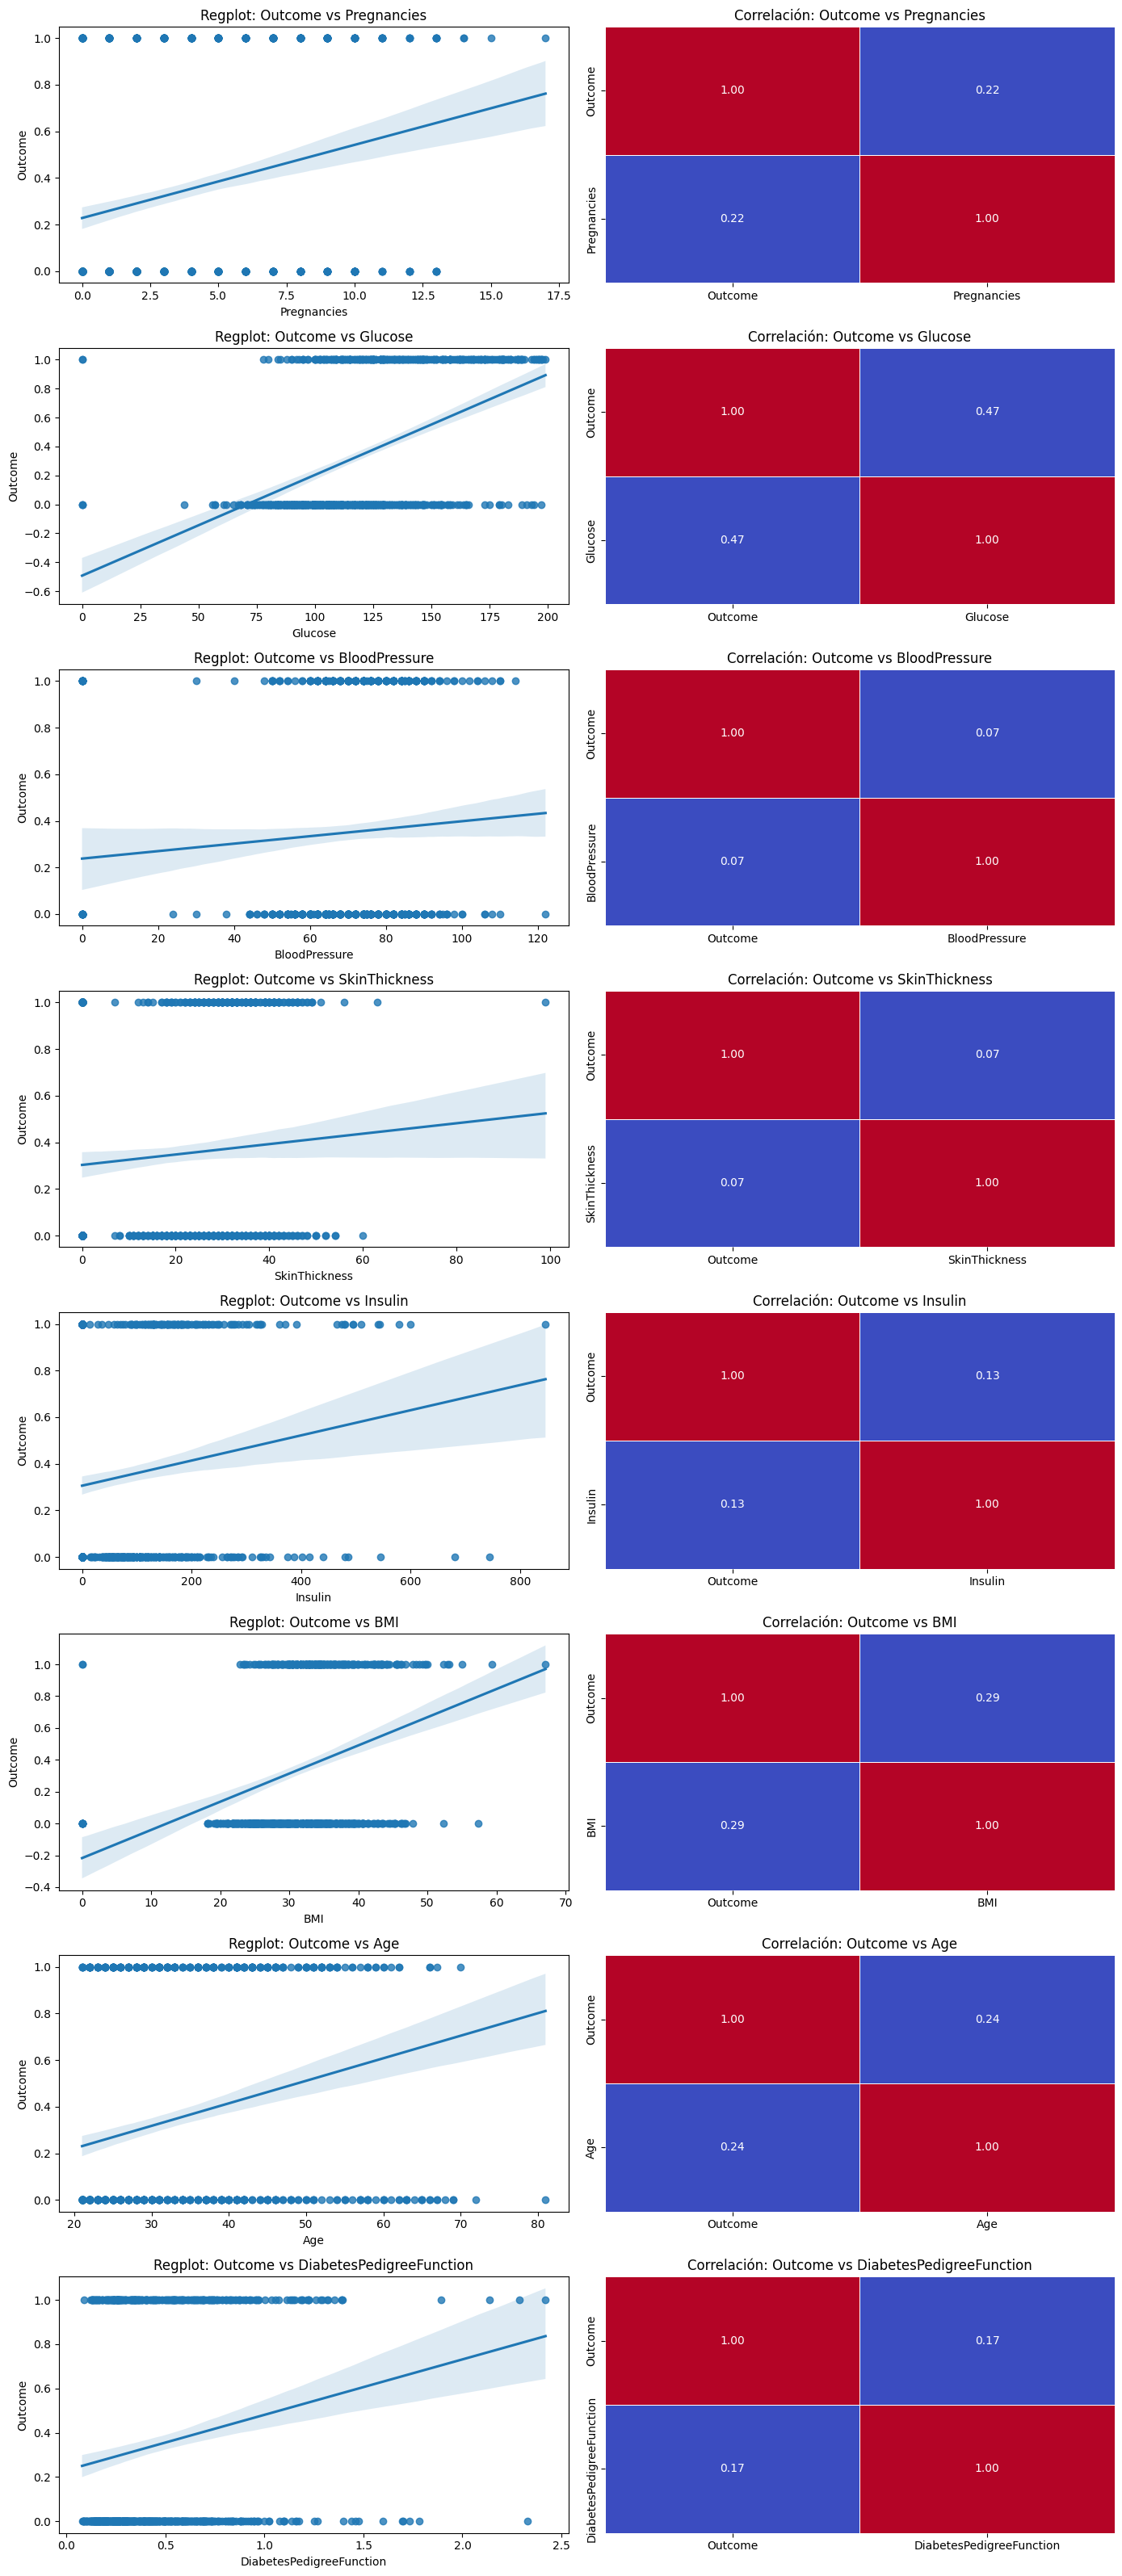

In [62]:
# Definir variables
num_vars = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]

target = "Outcome"

n_cols = 2  # Dos columnas: regplot y heatmap
n_rows = len(num_vars)  # Una fila por cada variable

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))

# Asegurar que axes sea 2D para indexar correctamente
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

# Graficar regplot y heatmap para cada variable
for i, var in enumerate(num_vars):
    # Columna 0: Regplot
    sns.regplot(data=total_data, x=var, y=target, ax=axes[i, 0])
    axes[i, 0].set_title(f"Regplot: {target} vs {var}")

    # Columna 1: Heatmap de correlación
    corr_matrix = total_data[[target, var]].corr()  # Matriz de correlación
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                cbar=False, linewidths=0.5, ax=axes[i, 1])
    axes[i, 1].set_title(f"Correlación: {target} vs {var}")

# Ajustar diseño
plt.tight_layout()
plt.show()

- ANÁLISIS DE CORRELACIONES:

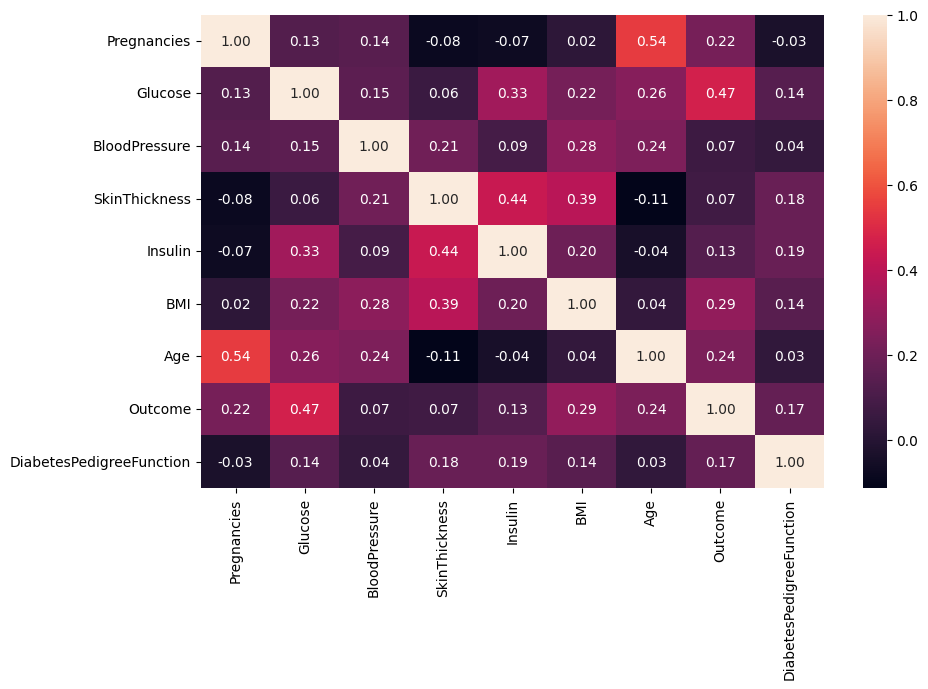

In [63]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


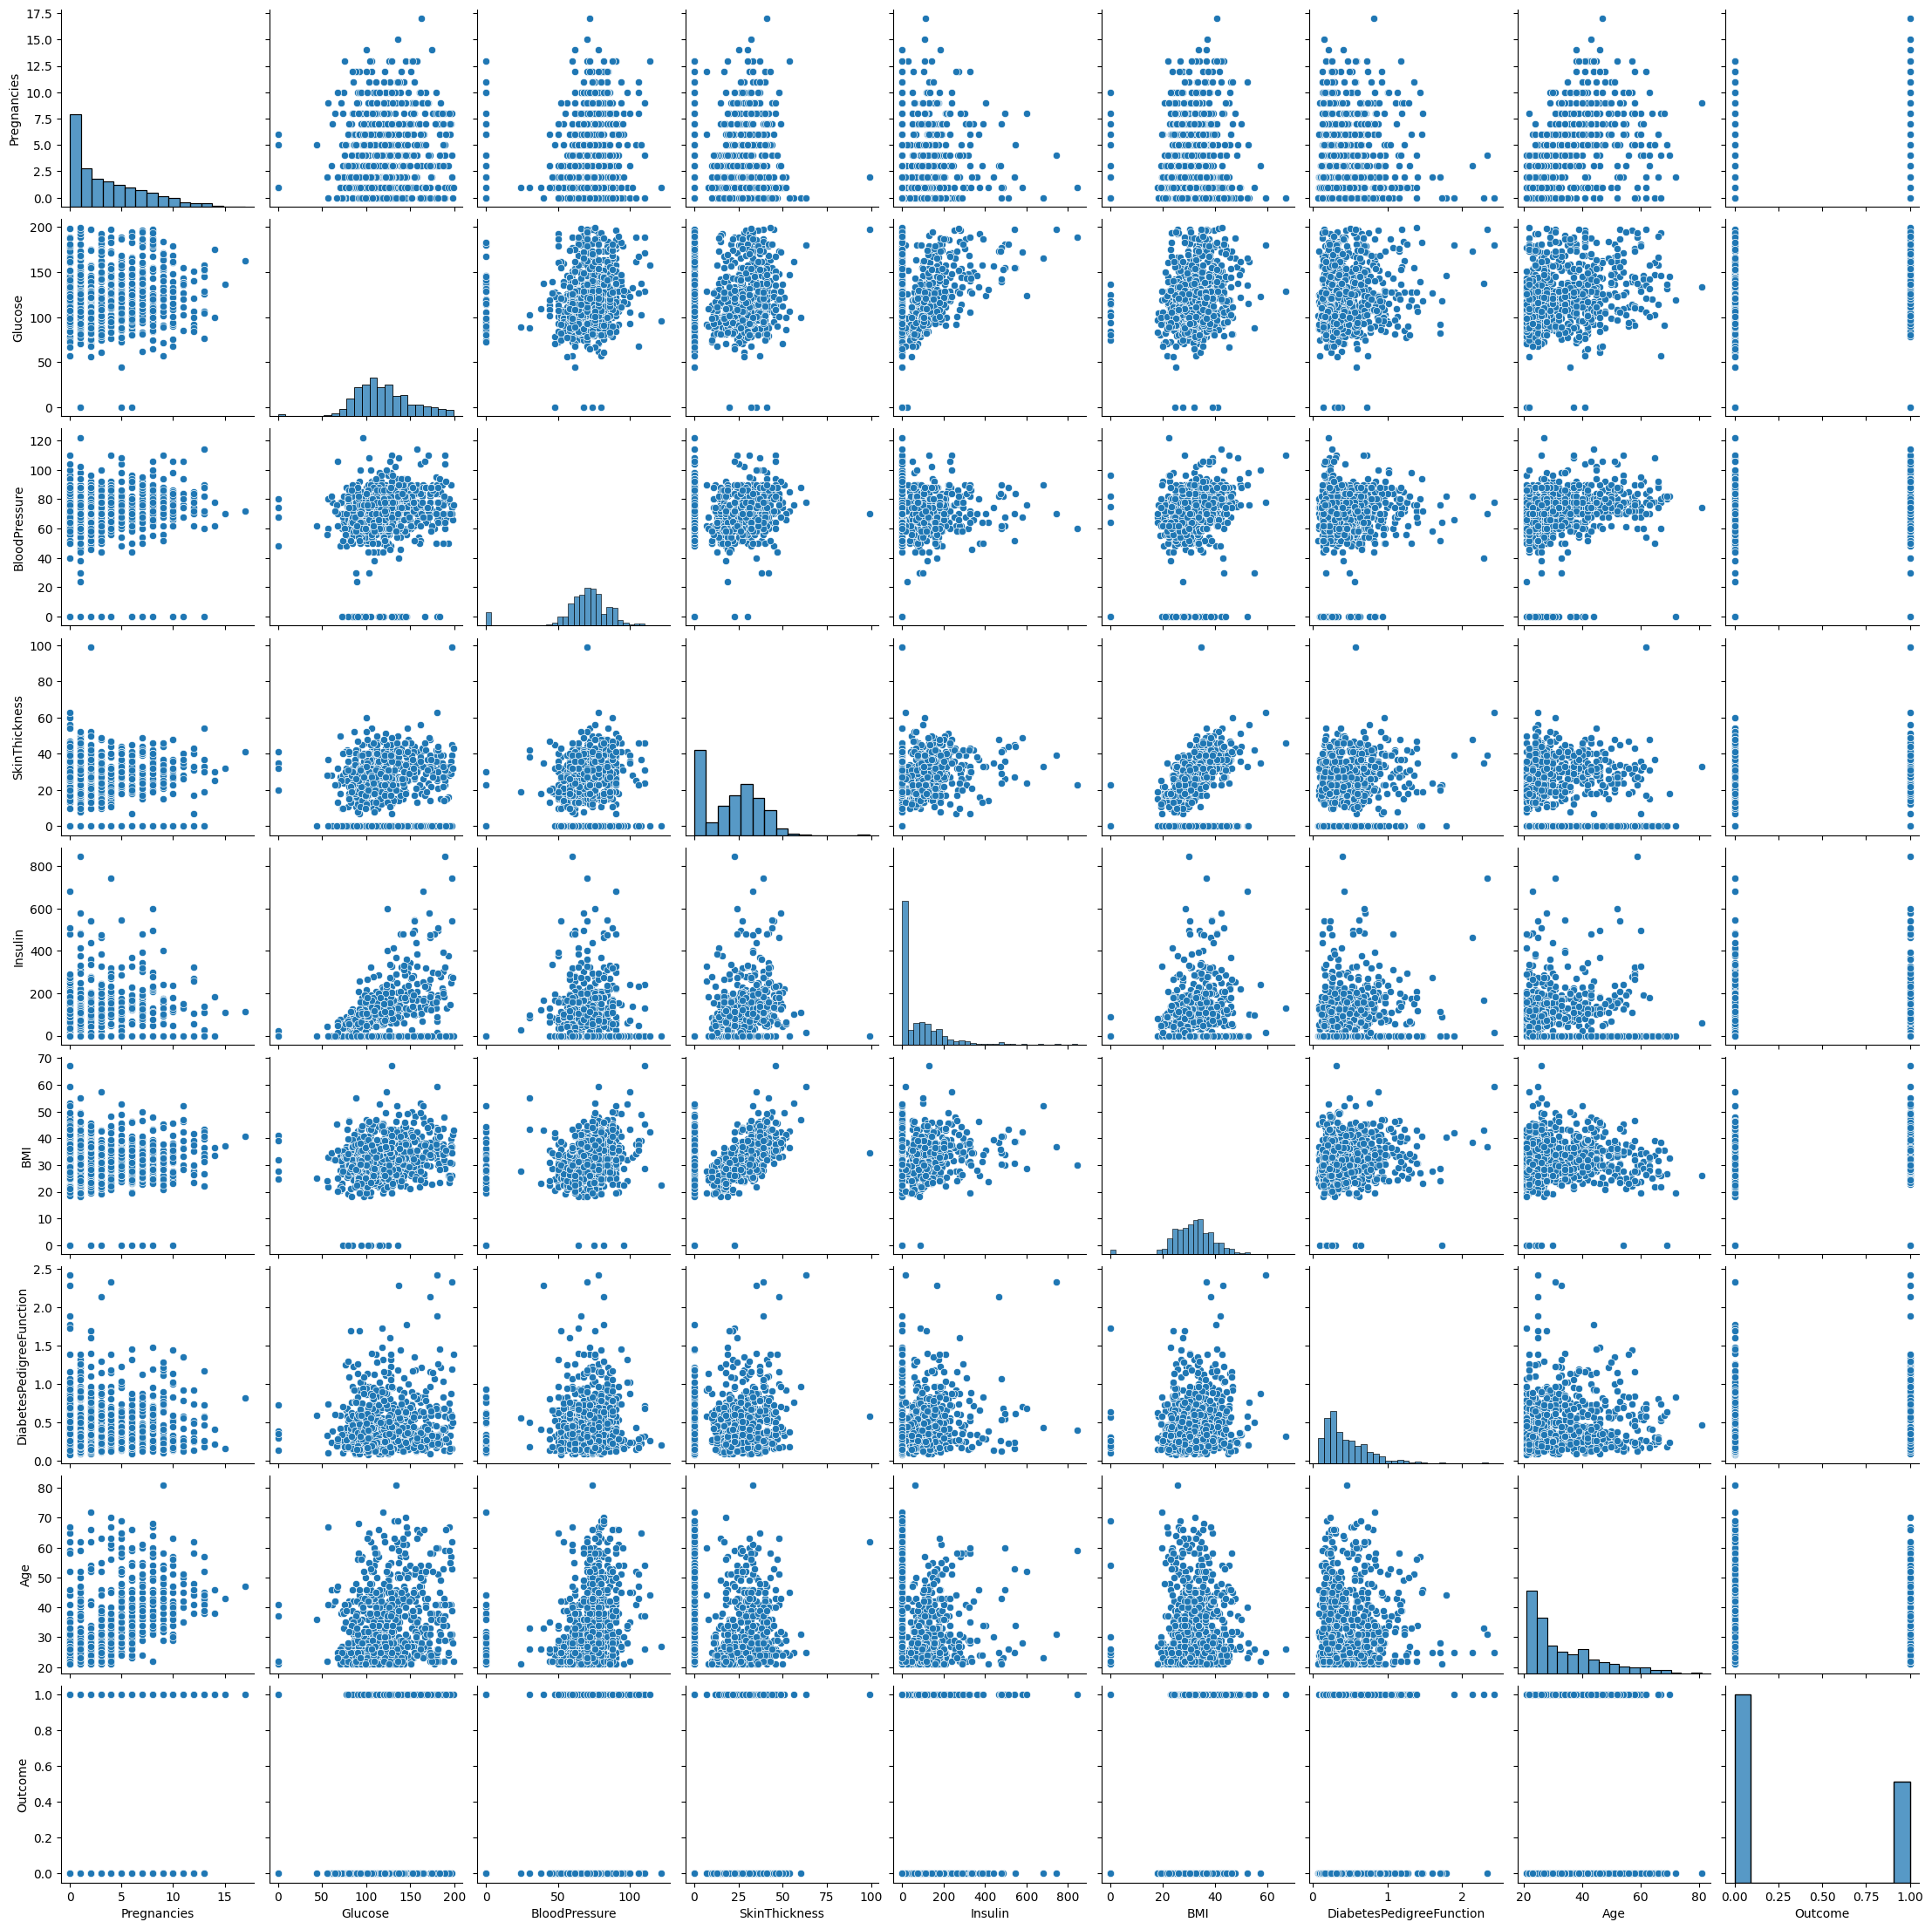

In [64]:
sns.pairplot(data = total_data)

# PASO 5: *Feature engineering*

- ANÁLISIS DE OUTLIERS: 

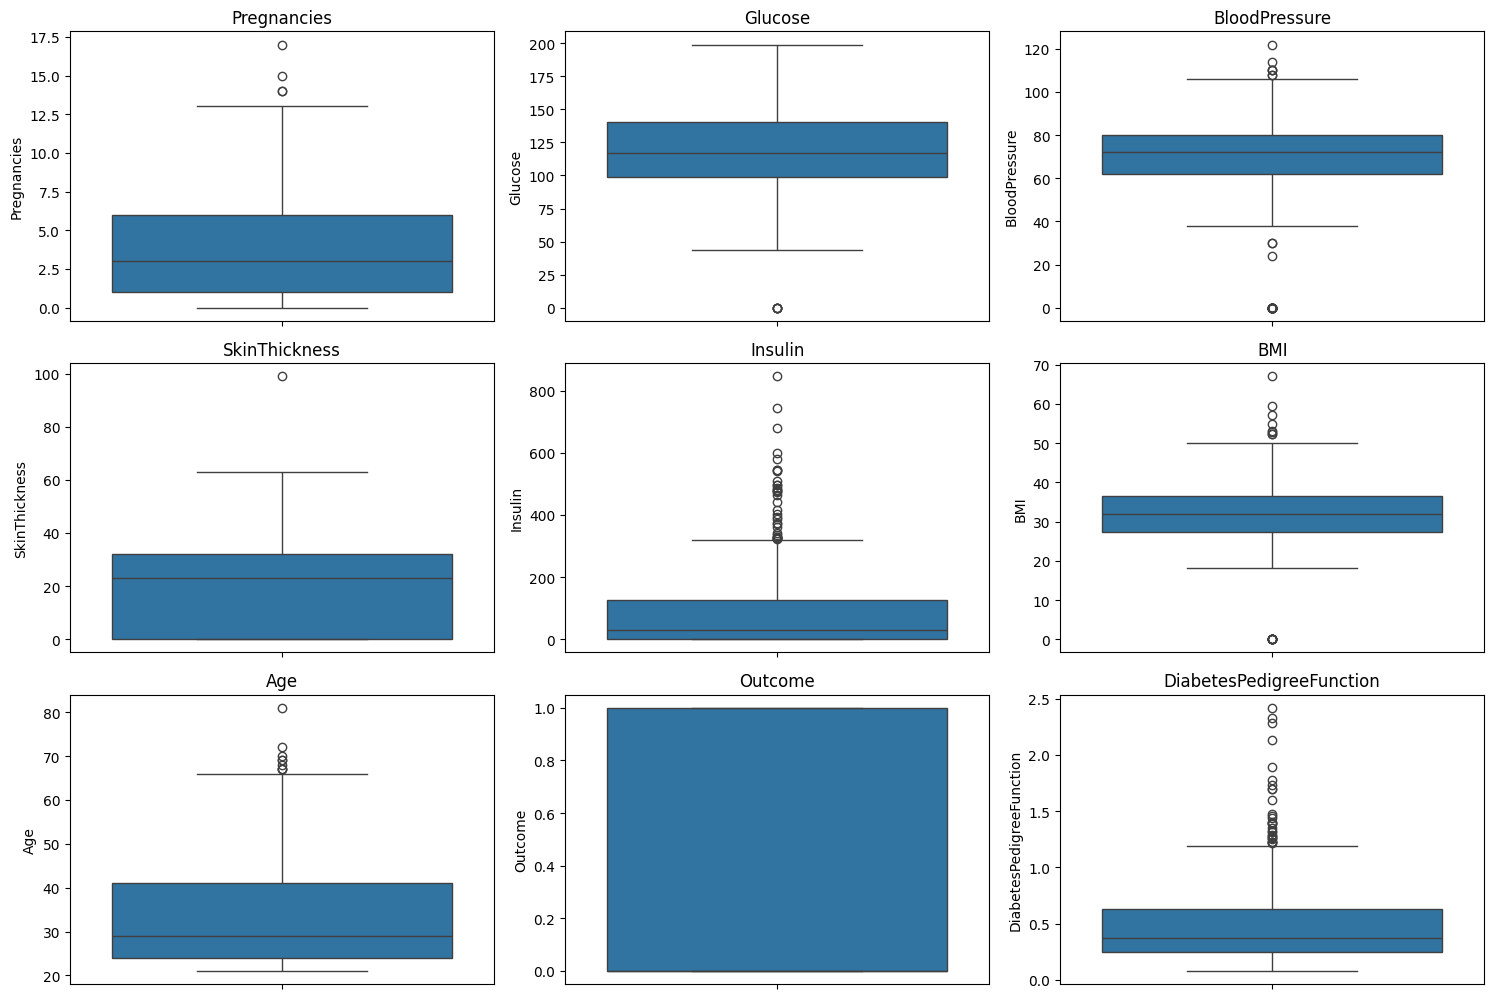

In [65]:
variables = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome", "DiabetesPedigreeFunction"
]

# Definir dimensiones (6 filas x 3 columnas)
fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # Tamaño ajustado
axes = axes.flatten()  # Convertimos la matriz en una lista para fácil acceso

# Generar los boxplots
for i, var in enumerate(variables):
    sns.boxplot(ax=axes[i], data=total_data, y=var)
    axes[i].set_title(var)  # Agregar título a cada gráfico

# Eliminar ejes vacíos si hay menos de 18 variables
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Se determina que la única variable que no contiene outliers es `Outcome`.

In [66]:
import json

# Generar copias del DataFrame
clean_data_con_outliers = total_data.copy()
clean_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
    """
    Reemplaza los valores outliers en la columna dada utilizando el método IQR.
    Retorna el DataFrame modificado y los límites de outliers.
    """
    column_stats = df[column].describe()
    column_iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * column_iqr
    lower_limit = column_stats["25%"] - 1.5 * column_iqr

    # Asegurar que el límite inferior no sea negativo (para datos como precios o población)
    if lower_limit < 0:
        lower_limit = 0

    # Reemplazar valores fuera de los límites
    df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
    df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

    return df.copy(), [lower_limit, upper_limit]

# Obtener todas las columnas numéricas del DataFrame
num_columns = total_data.select_dtypes(include=["number"]).columns

# Diccionario para almacenar los límites de outliers
outliers_dict = {}

# Aplicar el reemplazo de outliers en cada columna numérica
for column in num_columns:
    clean_data_sin_outliers, limits_list = replace_outliers_from_column(column, clean_data_sin_outliers)
    outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo JSON
with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f, indent=4)

# Mostrar el diccionario con los límites de outliers
print(json.dumps(outliers_dict, indent=4))

{
    "Pregnancies": [
        0,
        13.5
    ],
    "Glucose": [
        37.125,
        202.125
    ],
    "BloodPressure": [
        35.0,
        107.0
    ],
    "SkinThickness": [
        0,
        80.0
    ],
    "Insulin": [
        0,
        318.125
    ],
    "BMI": [
        13.35,
        50.550000000000004
    ],
    "DiabetesPedigreeFunction": [
        0,
        1.2
    ],
    "Age": [
        0,
        66.5
    ],
    "Outcome": [
        0,
        2.5
    ]
}


In [67]:
clean_data_sin_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


- ANÁLISIS DE VALORES FALTANTES:

In [68]:
clean_data_con_outliers.isnull().sum().sort_values(ascending=False)
clean_data_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Crear carpeta si no existe
ruta_base = r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-Decision-Tree-Project\data\processed\clean_data_xlsx"
os.makedirs(ruta_base, exist_ok=True)  # Crea la carpeta si no existe

# Seleccionar todas las variables numéricas excepto la target 'y_n'
vars_clean_data = clean_data_con_outliers.select_dtypes(include=["number"]).columns.tolist()
vars_clean_data.remove("Outcome")  # Eliminamos la variable objetivo

# Definir variables X (features) e y (target)
X_con_outliers = clean_data_con_outliers[vars_clean_data]
X_sin_outliers = clean_data_sin_outliers[vars_clean_data]
y = clean_data_con_outliers["Outcome"]

# Dividir los datos en train y test
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(
    X_con_outliers, y, test_size=0.2, random_state=42
)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(
    X_sin_outliers, test_size=0.2, random_state=42
)

# Diccionario con los datasets
datasets = {
    "X_train_con_outliers": X_train_con_outliers,
    "X_train_sin_outliers": X_train_sin_outliers,
    "X_test_con_outliers": X_test_con_outliers,
    "X_test_sin_outliers": X_test_sin_outliers,
    "y_train": y_train,
    "y_test": y_test
}

# Guardar los archivos en Excel
for nombre, df in datasets.items():
    ruta_archivo = os.path.join(ruta_base, f"{nombre}.xlsx")
    df.to_excel(ruta_archivo, index=False)